# **Machine Learning - Unsupervised Lerning**

# **Clustering**

Clustering in AI (Artificial Intelligence) is a type of unsupervised learning technique used to group similar data points into clusters or groups. The goal is to ensure that data points within the same cluster are more similar to each other than to those in other clusters. Here's a more detailed explanation:

### **Key Concepts**

* **Unsupervised Learning:** Unlike supervised learning, clustering doesn't use labeled data. The algorithm tries to identify patterns and relationships within the data without any predefined categories.

* **Similarity Measure:** Clustering relies on a similarity measure (such as Euclidean distance) to assess how close or far apart data points are. This measure determines how clusters are formed.

* **Centroids:** Many clustering algorithms use centroids (central points of clusters) to represent the clusters. The position of these centroids is adjusted iteratively to better fit the data points.

### **Common Clustering Algorithms**

* **K-Means Clustering:** This algorithm partitions the data into K clusters. It randomly initializes K centroids and assigns each data point to the nearest centroid. The centroids are then updated to be the mean of the assigned points, and the process repeats until convergence.

* **Hierarchical Clustering:** This method creates a tree-like structure of clusters (dendrogram). It can be agglomerative (starting with individual points and merging them) or divisive (starting with all points in one cluster and splitting them).

* **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** This algorithm groups together points that are closely packed and marks points that are in low-density regions as outliers. It does not require the number of clusters to be specified beforehand.

* **Gaussian Mixture Models (GMM):** This probabilistic model assumes that the data is generated from a mixture of several Gaussian distributions with unknown parameters. It uses the Expectation-Maximization (EM) algorithm to find the parameters.

### **Applications of Clustering**

* **Customer Segmentation:** Grouping customers based on purchasing behavior for targeted marketing.
* **Anomaly Detection:** Identifying outliers in data, such as fraudulent transactions.
* **Image Segmentation:** Dividing an image into regions with similar attributes for easier analysis.
* **Document Clustering:** Grouping similar documents for information retrieval or topic modeling.

### **Example**

Consider a dataset of animals based on features like weight and height. Using a clustering algorithm, you might find distinct groups such as:

* Small, light animals (e.g., cats, rabbits)
* Medium-sized animals (e.g., dogs, foxes)
* Large, heavy animals (e.g., horses, cows)
Each group represents a cluster where the animals share similar characteristics.

### **Visualization**

Visualizing clusters can be done using scatter plots, where different clusters are often marked with different colors to show the grouping of data points.

# **K - Means Clustering**

In [41]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [42]:
data_wine = pd.read_csv("Wine.csv")
data_wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280 or OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
data_wine.iloc[:, 0].values # there are 3 categories/clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [44]:
ind_data_wine = data_wine.iloc[:,1:] # lets get a sub table of data_wine that contain only independent variable, 
                                    # bcs real data set doesnt contains responsive(y) varible
ind_data_wine # new data set

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280 or OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [79]:
k_means_clustering_model = KMeans(n_clusters=3, n_init=10) # we already it is 3, practically we have to find by optimizing

In [80]:
k_means_clustering_model.fit(ind_data_wine)

KMeans(n_clusters=3, n_init=10)

#### What are the cluters we got

In [47]:
print(len(k_means_clustering_model.labels_))
print(k_means_clustering_model.labels_)
# here we have rownumberof(178) points that defined by column no of(13) coordinates, 
# from these we choose randomly 3 point and do clustering, below numbers are not the class that defined in Wine data set, 
# but these are the categories(groups) identified by model

178
[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


In [51]:
k_means_clustering_model.inertia_

2370689.686782969

## Let find optimum no of clusters ( k Value)

In [59]:
inertia_list = []
k_list = np.arange(1, 16)
for k in k_list:
    model = KMeans(n_clusters=k, n_init=10) # set if want , n_init = 10
    model.fit(ind_data_wine)
    inertia_list.append(model.inertia_)
# The n_init parameter specifies the number of times the k-means algorithm will be run with different centroid seeds. 
# By explicitly setting n_init=10, you suppress the future warning.

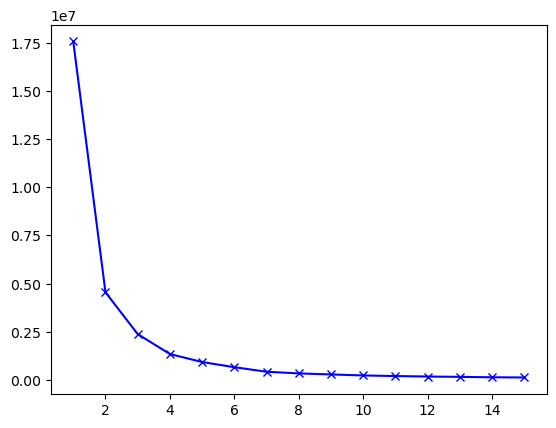

In [60]:
plt.plot(k_list, inertia_list, "bx-") # "bx-" for croses
plt.show()
# optimum value is elbo point i.e) 3

# **Hierarchical Clustering**
* ## **Agglomerative Clustering**
* ## **Divisive Clustering** (Not use now)


### At first check how many clusters we want using below method

In [65]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

In [68]:
data_shopping = pd.read_csv("Shopping.csv")
data_shopping.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
sub_data_shopping = data_shopping.iloc[:, 3:].values

In [74]:
cluster_result = shc.linkage(sub_data_shopping, method = "ward") # cluster combining ---> single, complete, average, ward

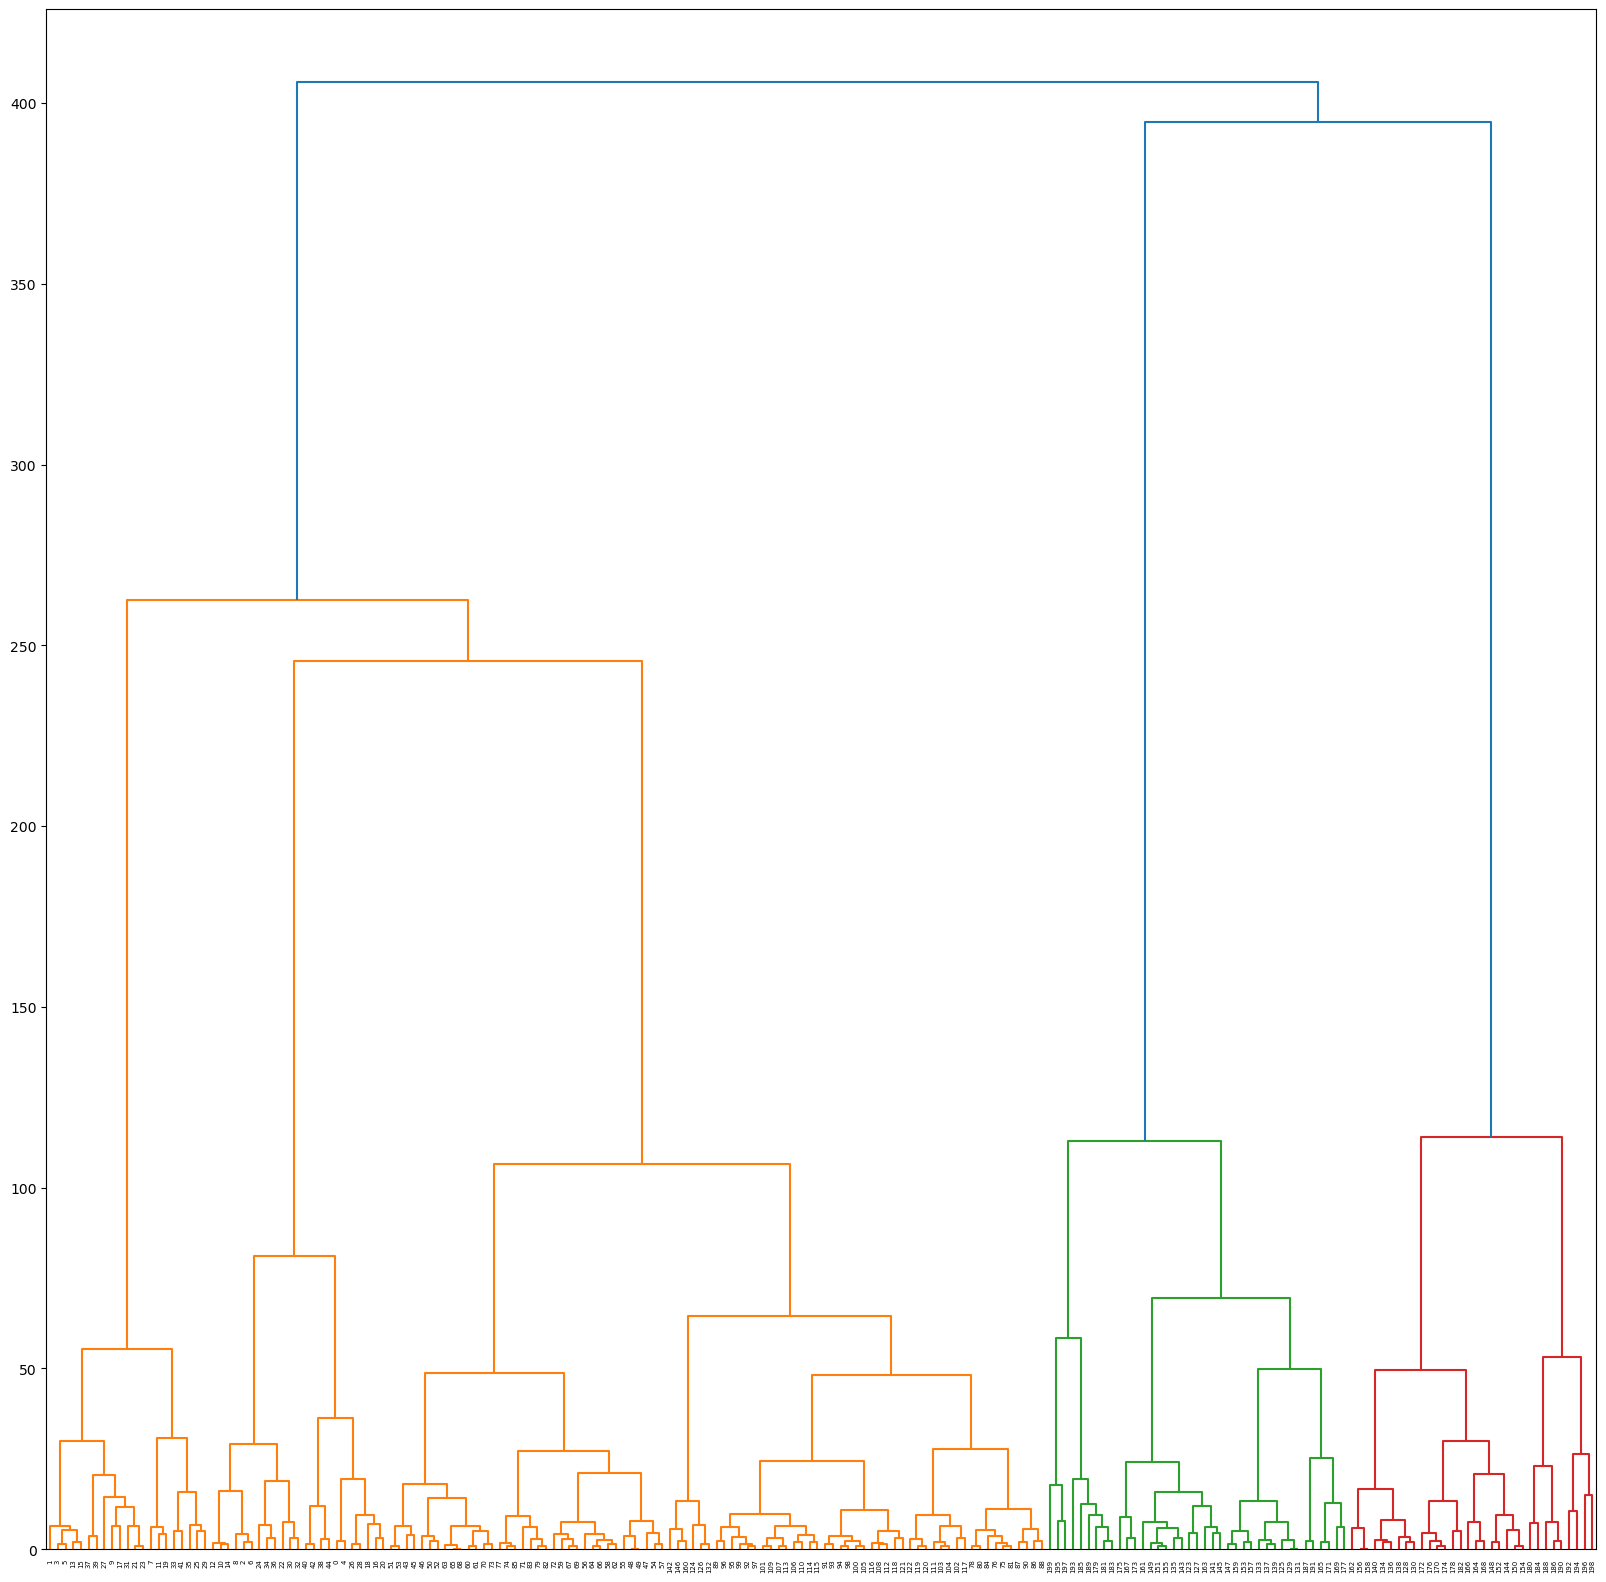

In [76]:
plt.figure(figsize=(20, 20))
shc.dendrogram(cluster_result)
plt.show()   # We can identify 5 clusters

In [77]:
agglomarativ_model = AgglomerativeClustering(n_clusters=5, affinity= "euclidean", linkage= "ward")

In [78]:
agglomarativ_model.fit(sub_data_shopping)

/home/pathum/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [81]:
agglomarativ_model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])